## Mapping, Visualization and Analysis 
### using ArcGIS API for Python
<br/>
<br/>


###  &nbsp;&nbsp;                Atma Mani
###  &nbsp;&nbsp;                Rohit Singh
 <img src="images/ScienceOfWhere2.PNG"/>

# ArcGIS API for Python

## A quick introduction

* Python API to your Web GIS

* Powerful, modern and easy to use

* Implemented using REST + local capabilities

<img src="images/WhatCanPythonAPIDoForYou.png" />

## API Overview

### A Pythonic platform for geospatial analysis
<img src="modules.png" />

## It all starts with your GIS

In [82]:
from arcgis.gis import GIS

In [83]:
from getpass import getpass
gis = GIS('https://deldev.maps.arcgis.com', 'deldev', getpass())

········


# Mapping
* Map Widget
* WebMap
* WebScene

## Map widget

In [84]:
m = gis.map('San Diego')
m

### Map widget properties

In [85]:
m

In [86]:
m.zoom

2

In [87]:
m.zoom = 15

In [88]:
m.extent

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'type': 'extent',
 'xmax': -13040017.12710633,
 'xmin': -13044746.6682316,
 'ymax': 3858623.2377234213,
 'ymin': 3856712.3120162413}

In [89]:
from arcgis.geocoding import geocode

In [90]:
redlands = geocode('Redlands, CA')[0]

In [91]:
m

In [92]:
m.extent = redlands['extent']

### In-built basemaps

In [93]:
m

In [95]:
import time

for basemap in m.basemaps:
    print(basemap)
    m.basemap = basemap
    time.sleep(2)

streets
satellite
hybrid
topo
gray
dark-gray
oceans
national-geographic
terrain
osm


In [94]:
m.basemaps

['streets',
 'satellite',
 'hybrid',
 'topo',
 'gray',
 'dark-gray',
 'oceans',
 'national-geographic',
 'terrain',
 'osm']

### Searching for layers

In [96]:
items = gis.content.search('San Diego')

<Item title:"Places to see in San Diego" type:Feature Collection owner:deldev>
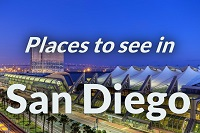

<Item title:"San Diego Trolley stations" type:Feature Collection owner:deldev>
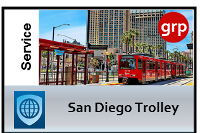

<Item title:"San Diego attractions web map" type:Web Map owner:deldev>
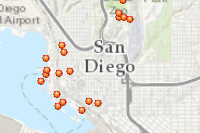

In [97]:
for item in items:
    display(item)

In [98]:
trolley_stations = items[1]
sd_attractions = items[0]

In [99]:
landsat_item = gis.content.search('Landsat Multispectral', 
                                  'Imagery Layer', outside_org=True)[0]

<Item title:"Landsat 8 Views" type:Imagery Layer owner:esri>
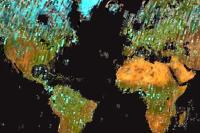

In [100]:
landsat_item

### Adding layers

In [101]:
sdmap = gis.map('San Diego', zoomlevel=12)
sdmap

In [102]:
sdmap.add_layer(sd_attractions)

In [103]:
sdmap.add_layer(trolley_stations)

In [104]:
sdmap.add_layer(landsat_item)

### Drawing on map

In [105]:
m = gis.map('Redlands, CA')
m

In [106]:
m.draw(redlands['location'])

### Popups

In [107]:
m = gis.map('Redlands, CA')
m

In [108]:
m.draw(redlands['location'], popup={'title': 'Redlands, CA', 
                                    'content': 'City of Redlands'})

### Popups - rich content

In [109]:
m = gis.map('Redlands, CA')
m

In [110]:
url = 'https://upload.wikimedia.org/wikipedia/en/thumb/6/6e/Esri_logo.svg/1280px-Esri_logo.svg.png'
m.draw(redlands['location'], 
       popup={'title': 'Esri Headquarters', 
              'content': "<img src='{}' width='240px'/>".format(url)})

### Symbology

In [111]:
m = gis.map('Redlands, CA')
m

In [114]:
finish_symbol = {"angle":0,
                 "xoffset":12,
                 "yoffset":12,
                 "type":"esriPMS",
                 "url":"http://static.arcgis.com/images/Symbols/Basic/CheckeredFlag.png",
                 "contentType":"image/png",
                 "width":24,
                 "height":24} # See https://developers.arcgis.com/javascript/3/samples/portal_symbols/
    
m.draw(redlands['location'], symbol=finish_symbol)

### Digitizing input

In [115]:
m = gis.map('Redlands, CA')
m

Computing length of drawn polyline...
Length: 20396.963121438217 m.


In [116]:
from arcgis.geometry import lengths

def calc_dist(map1, g):
    print("Computing length of drawn polyline...")
    length = lengths(g['spatialReference'], [g], "", "geodesic")
    print("Length: " + str(length[0]) + " m.")

# Set calc_dist as the callback function to be invoked when a polyline is drawn on the map
m.on_draw_end(calc_dist)
m.draw("freehandpolyline")

## Web Maps

<Item title:"Stamen Watercolor" type:Web Map owner:dkensok>
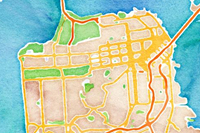

In [117]:
stamen_watercolor = gis.content.search('Stamen Watercolor owner:dkensok', 
                                       'Web Map', 
                                       outside_org=True)[0]
stamen_watercolor

In [118]:
m2 = gis.map(stamen_watercolor)
m2

In [119]:
ny = geocode('Central Park, New York, NY')[0]

In [120]:
m2.extent = ny['extent']

## Web Scenes

In [121]:
pictometry = gis.content.search('Pictometry', 
                                'Web Scene', outside_org=True)[0]

<Item title:"Pictometry 3D Scene" type:Web Scene owner:whitepeterj>
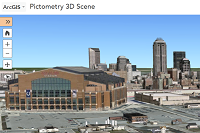

In [122]:
pictometry

In [123]:
arcgis.mapping.WebScene(pictometry)

WebScene([('operationalLayers',
           [{'id': '14f89254c32-layer-11',
             'itemId': 'edb35a635df244afa33bc056319d7e82',
             'layerType': 'ArcGISSceneServiceLayer',
             'opacity': 1,
             'title': 'Philadelphia 3D Pictometry',
             'url': 'http://scenesampleserverdev.arcgis.com/arcgis/rest/services/Hosted/Buildings_Philadelphia/SceneServer/layers/0',
             'visibility': True},
            {'id': '14f891a6725-layer-13',
             'itemId': 'd5271294f1e04ac9acc5b36feaab7859',
             'layerType': 'ArcGISSceneServiceLayer',
             'opacity': 1,
             'title': 'Indianapolis 3D Pictometry',
             'url': 'http://scenesampleserverdev.arcgis.com/arcgis/rest/services/Hosted/buildings_Indianapolis/SceneServer/layers/0',
             'visibility': True}]),
          ('version', '1.3'),
          ('baseMap',
           {'baseMapLayers': [{'id': '14e74359f2a-layer-19',
              'layerType': 'ArcGISTiledMapServiceLayer',
              'url': 'http://services.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer'}],
            'elevationLayers': [{'id': 'globalElevation',
              'layerType': 'ArcGISTiledElevationServiceLayer',
              'url': 'http://elevation3d.arcgis.com/arcgis/rest/services/WorldElevation3D/Terrain3D/ImageServer'}],
            'id': 'basemap_9',
            'title': 'Imagery'}),
          ('spatialReference', {'latestWkid': 3857, 'wkid': 102100}),
          ('viewingMode', 'global'),
          ('authoringAppVersion', '4.1.0.0'),
          ('initialState',
           {'environment': {'lighting': {'datetime': 1426441482000,
              'displayUTCOffset': -5}},
            'viewpoint': {'camera': {'heading': 62.80271974250253,
              'position': {'spatialReference': {'latestWkid': 3857,
                'wkid': 102100},
               'x': -9592877.078513974,
               'y': 4832131.093278602,
               'z': 337.0077287713066},
              'tilt': 70.27483889699863},
             'rotation': 297.1972802574975,
             'scale': 1287.6467604013562,
             'targetGeometry': {'spatialReference': {'latestWkid': 3857,
               'wkid': 102100},
              'x': -9592511.365077905,
              'y': 4832319.014032653,
              'z': 223.6949228271842}}}),
          ('authoringApp', 'WebSceneViewer'),
          ('presentation',
           {'slides': [{'baseMap': {'baseMapLayers': [{'id': '14e74359f2a-layer-19',
                 'layerType': 'ArcGISTiledMapServiceLayer',
                 'url': 'http://services.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer'}],
               'id': 'basemap_9',
               'title': 'Imagery'},
              'description': {'text': ''},
              'environment': {'lighting': {'datetime': 1426441477000,
                'displayUTCOffset': -5}},
              'id': 'slide_7',
              'thumbnail': {'url': 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAA9AHADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDjPGm2PxpNE0gk8pgPmbcUYjJGOxBJ98nNT6Xb6pcaZI6WjtZNzFIWC9DzjOOM/wBcZ7Xfh5ZW15Z39yLeKJnOIpZQqkDBB2c9iDyp+vSutsbTS4Iomj0+zVjxhrWPgYz/AHc9awulozVX3Rzdlp995V7JLGklw8Z2RB9mcqFYHOQOnHHUg9hi/ZSXMNx

### Querying/updating layers and symbology

Refer to https://developers.arcgis.com/python/sample-notebooks/using-and-updating-GIS-content/

# Visualization

# Analysis

## A Pythonic platform for geospatial analysis
<img src="modules.png" />

# Python API at the UC

<img src='images/schedule.png'/>

<img src='images/SurveySlide.PNG' />

<img src='images/LastSlide.PNG' />